<a href="https://colab.research.google.com/github/AlexxxisDxlgxdx/M-todos-numericos/blob/main/Interpolaci%C3%B3n1(Lagrange).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metodos numericos  Lagrange

In [ ]:
## Metodos numericos  Lagrange

import matplotlib.pyplot as plt
from sympy import*
#importamos biblioteca para trabajar con matrices
import numpy as np
#Definimos funcion
def vand(x):
  n = len(x) #cantidad de elementos de "x"
  d = np.zeros([n,n]) #creamos matriz con ceros
  #Llenamos matriz
  for i in range(n):
    for j in range(n):
      d[i][j] = x[i]**(n-j-1) #llenamos matriz vandermonde con valores de "x"
 # dt=1
 # for i in range(n):
 #     for j in range(n):
 #         if j<i:
 #           dt=dt*(x[j]-x[i])
  dtt = np.linalg.det(d)  #Calculamos determinante de la matriz
  c = np.linalg.cond(d) #Calculamos numero de condicion para ver que tan
                        #Grande puede ser el error con los valores inicales dados
  return [d, dtt, c]





In [ ]:
x = [300,50000,700000,9000000,130000000,1600000000]
vand(x)

[array([[2.430000e+12, 8.100000e+09, 2.700000e+07, 9.000000e+04,
         3.000000e+02, 1.000000e+00],
        [3.125000e+23, 6.250000e+18, 1.250000e+14, 2.500000e+09,
         5.000000e+04, 1.000000e+00],
        [1.680700e+29, 2.401000e+23, 3.430000e+17, 4.900000e+11,
         7.000000e+05, 1.000000e+00],
        [5.904900e+34, 6.561000e+27, 7.290000e+20, 8.100000e+13,
         9.000000e+06, 1.000000e+00],
        [3.712930e+40, 2.856100e+32, 2.197000e+24, 1.690000e+16,
         1.300000e+08, 1.000000e+00],
        [1.048576e+46, 6.553600e+36, 4.096000e+27, 2.560000e+18,
         1.600000e+09, 1.000000e+00]]),
 -3.8243450764708415e+115,
 1.0554439436603732e+46]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Importamos bniblioteca para variable simbolica (sin usar sympy.)
from sympy import*
#Definimos funcion de Lagrange
def lagrange(x, y, u=None): # "u" valor opcional si quieres clacular en un punto
  n = len(x)  #cantidad de elementos de "x"
  t = Symbol('t')  #Trabajamos con variable simbolica "t"
  p = 0 # se inicializa el polinomio ne 0
  #Se construye polinomio de Lagrange
  for i in range (n):
    L = 1
    for j in range(n):
      if i != j:
        L = L * (t - x[j])/(x[i] - x[j])
    p = p + y[i] * L #Se almacena el polinomio
    p = expand(p)   #Se expresa de forma simplificada
    #Se imprime segun condiciion (Si se evalua en un punto)
  if u==None:
      return p
  else:
      r = p.subs(t,u) #Se evalua polinomio en punto
      return r


In [ ]:
x = [1960, 1970, 1990, 2000]
y = [3039585530, 3707475887, 5281653820, 6079603571]

p = lagrange(x, y)
print(p)
evaluado = lagrange(x, y, u = 1980)
print(evaluado)

-4333513*t**3/480 + 32306393419*t**2/600 - 2567056381705*t/24 + 212330115856963/3
26837329727/6


In [ ]:
import numpy as np

from sympy import*
#importamos libreria para graficar
import matplotlib.pyplot as plt
def plot_lagrange_interpolation(x, y, x_eval, y_real):
  #Llamos a la funcion lagrange hecaha anteriormente
  p = lagrange(x, y)


 # Evaluamos el polinomio en el punto x_eval
  y_eval = lagrange(x, y, x_eval)

  #Convertimos polinomio en una funcion que pudea evaluar un conjunto de valores
  p_func = lambdify(Symbol('t'), p, modules = ['numpy'])


  # Calcular el error absoluto
  error_abs = abs(y_real - y_eval)

  # Imprimir el error
  print(f"Valor interpolado en x = {x_eval}: {y_eval}")
  print(f"Error absoluto en el punto ({x_eval}, {y_real}): {error_abs}")

  #Creamos conjunto de valores para x y poder graficar
  x_vals = np.linspace(min(x) - 20, max(x) + 20, 500)
  #Evaluamos funcion en conjunto de valores
  y_vals = p_func(x_vals)

  #creamos Figura
  plt.figure(figsize = (8,6))
  #Creamos Grafica
  plt.plot(x_vals, y_vals, label = 'Polinomio Interpolador de lagrange', color = 'blue')

  #Graficamos los puntos originales
  plt.scatter(x, y, color = 'red', zorder = 5)
  # Marcamos el punto de evaluación
  plt.scatter([x_eval], [y_real], color='purple', zorder=6, label=f'Punto de Evaluación ({x_eval}, {y_real})')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Interpolación de Lagrange')
  plt.grid()
  plt.legend()
  plt.show()




Valor interpolado en x = 1980: 8989129707/2
Error absoluto en el punto (1980, 4452584592): 83960523/2


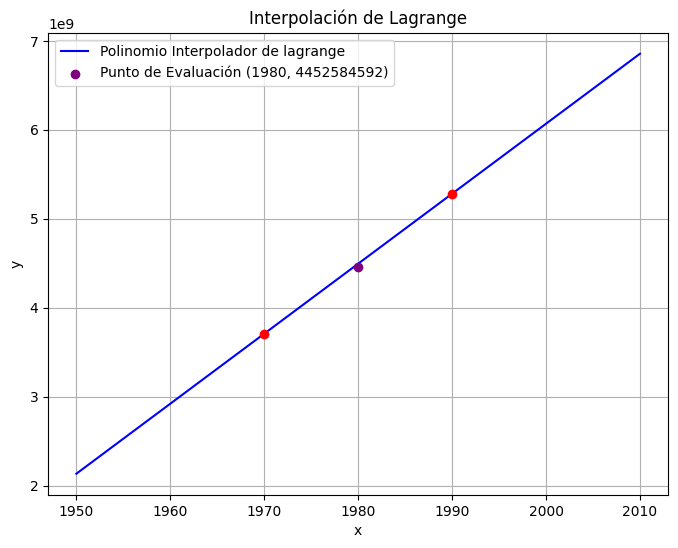

In [ ]:
x = [1970, 1990]
y = [3707475887, 5281653820]
x_eval = 1980
y_real = 4452584592
plot_lagrange_interpolation(x,y, x_eval, y_real)

Valor interpolado en x = 1980: 13364495951/3
Error absoluto en el punto (1980, 4452584592): 6742175/3


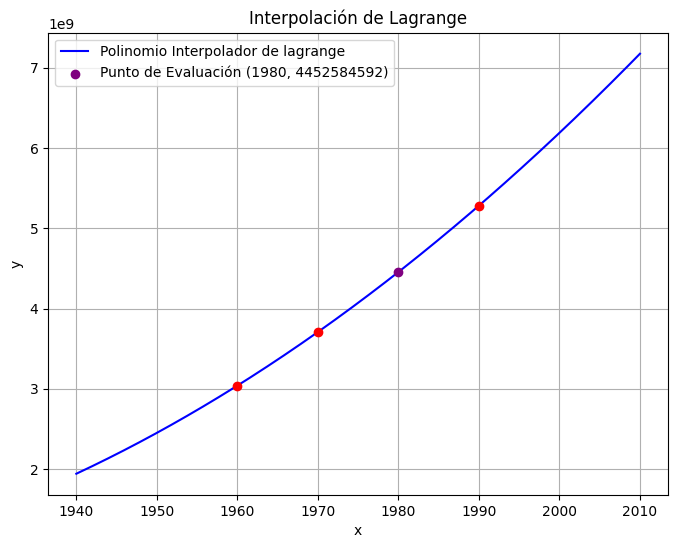

In [ ]:
x = [1960, 1970, 1990]
y = [3039585530, 3707475887, 5281653820]
x_eval = 1980
y_real = 4452584592
plot_lagrange_interpolation(x,y, x_eval, y_real)

Valor interpolado en x = 1980: 26837329727/6
Error absoluto en el punto (1980, 4452584592): 121822175/6


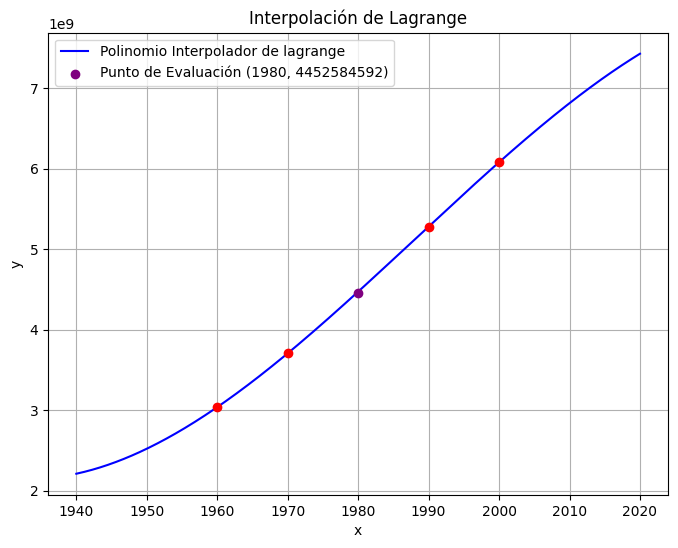

In [ ]:
x = [1960, 1970, 1990, 2000]
y = [3039585530, 3707475887, 5281653820, 6079603571]
x_eval = 1980
y_real = 4452584592
plot_lagrange_interpolation(x,y, x_eval, y_real)